In [1]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
df = pd.read_csv('../Data/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

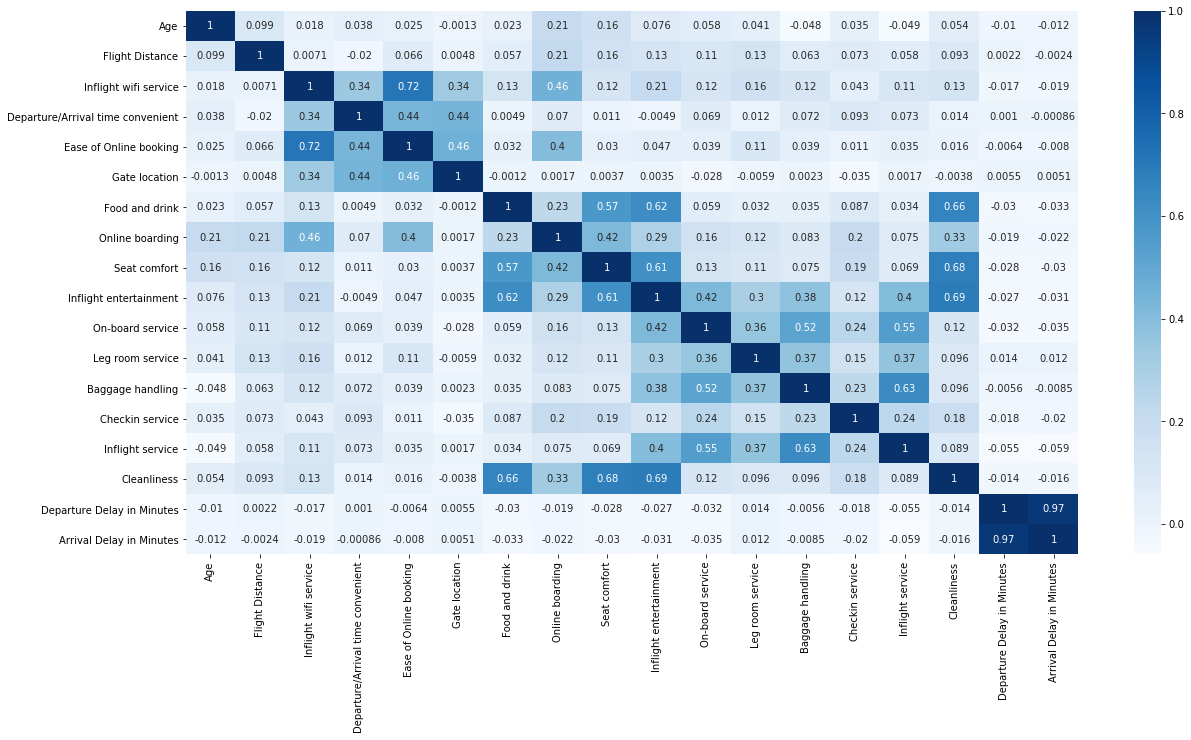

In [4]:
plt.figure(figsize=(20,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)

In [5]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [6]:
#Subset of the data
X = df[df.columns[6:20]] 

In [7]:
# Kaiser-Meyer-Olkin (KMO) Test
# Dùng để xem xét sự thích hợp của phân tích nhân tố (0.5 <= kmo <=1)
# KMO phải đạt 0.5 trở lên thì mới đủ điều kiện để thực hiện phân tích nhân tố
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

0.781229425716438

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, sig=calculate_bartlett_sphericity(X)
print('Chi square value:', chi_square_value)
print('Sig. ', sig)

Chi square value: 601690.8930479608
Sig.  0.0


In [9]:
fa = FactorAnalyzer()
fa.fit(X)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='promax',
               rotation_kwargs={}, use_smc=True)

[3.80011677 2.36198598 2.16589224 1.06327401 0.95093123 0.7003355
 0.53995637 0.51465504 0.46947475 0.36866001 0.32840792 0.29509562
 0.25317089 0.18804368]


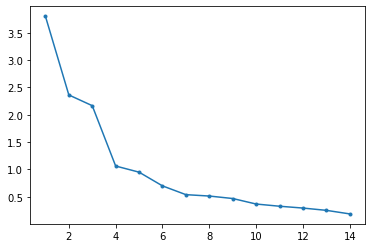

In [10]:
#Get Eigen values and plot
ev, v = fa.get_eigenvalues()
print(ev)
plt.plot(range(1,X.shape[1]+1),ev, marker='.')

In [11]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(X)
loads = fa.loadings_
print(loads)

[[ 0.16826952  0.12827119  0.75809134]
 [-0.02950837  0.05968117  0.50138365]
 [ 0.03023106  0.02091436  0.93277526]
 [-0.0338282  -0.03231121  0.50404385]
 [ 0.75263893  0.01094635  0.00616734]
 [ 0.39545345  0.1138114   0.35906543]
 [ 0.78999048  0.08146326  0.02725824]
 [ 0.7456934   0.46674984  0.01203424]
 [ 0.09388069  0.70115382  0.02900913]
 [ 0.07445487  0.48144209  0.08065029]
 [ 0.02346305  0.76474833  0.02769279]
 [ 0.14351222  0.28418169  0.02888186]
 [ 0.01813146  0.79977083  0.01825226]
 [ 0.85842046  0.08814824 -0.00170807]]


In [1]:
ylabels=[]
for i in range(1,15):
    ylabels.append(i)
sns.heatmap(loads, annot=True, cmap='Blues', yticklabels=ylabels)

NameError: name 'sns' is not defined

In [13]:
columns = []
for col in X.columns:
    columns.append(col)
print(columns)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [14]:
vars_of_factor1 = []
vars_of_factor2 = []
vars_of_factor3 = []

index1 = np.where(loads[:,0]>=0.5)[0]
for i in index1:
    vars_of_factor1.append(columns[i])
print('Variables of factor 1:', vars_of_factor1)

index2 = np.where(loads[:,1]>=0.5)[0]
for i in index2:
    vars_of_factor2.append(columns[i])
print('Variables of factor 2:', vars_of_factor2)

index3 = np.where(loads[:,2]>=0.5)[0]
for i in index3:
    vars_of_factor3.append(columns[i])
print('Variables of factor 3:', vars_of_factor3)


Variables of factor 1: ['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']
Variables of factor 2: ['On-board service', 'Baggage handling', 'Inflight service']
Variables of factor 3: ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']


In [ ]:
factor1 = X[vars_of_factor1]
factor2 = X[vars_of_factor2]
factor3 = X[vars_of_factor3]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print('Factor 1 alpha:', factor1_alpha[0])
print('Factor 2 alpha:', factor2_alpha[0])
print('Factor 3 alpha:', factor3_alpha[0])